
# Testing Normality of Residuals Using the Kolmogorov-Smirnov Test

In this notebook, we will explore how to use the **Kolmogorov-Smirnov (K-S) test** to check if the residuals of a linear regression model follow a normal distribution. Ensuring the residuals are normally distributed is essential for valid statistical inference in regression analysis.

We will cover:
1. Theoretical background of the K-S test.
2. Generating synthetic data where residuals are normal and non-normal.
3. Visual diagnostics (Histogram, Q-Q plot).
4. Performing the K-S test.
5. Understanding the impact of outliers, heteroscedasticity, and non-linearity.
6. Addressing non-normal residuals.


# How to Test for Normality

The image below depicts some of the common methods for testing for the normality of a dataset:
  - Qualitative/Visual: Histogram; QQ-Plot
  - Quantitative/Statistical/Hypothesis Tests: D'Agostino-Pearson omnibus; Shapiro-Wilk; Kolmogorov-Smirnov

![Description of the image](./normality.png)

In practice most statisticians generally recommend using both visual inspection and a statistical test to form a conclusion.

# Kolmogorov–Smirnov Test for Normality of Residuals in Linear Regression

In this notebook, we'll:
1. **Generate synthetic data** for a simple linear regression model in two different scenarios:
   - **Case 1:** Residuals (errors) drawn from a normal distribution.
   - **Case 2:** Residuals drawn from a non-normal (skewed) distribution.
2. **Fit a linear regression model** in each scenario and extract the residuals.
3. **Standardize the residuals** (so they have mean 0 and standard deviation 1).
4. **Apply the Kolmogorov–Smirnov (K-S) test** to check if the standardized residuals come from a normal distribution.
5. **Visualize** the distribution of the standardized residuals using histograms and Q-Q plots for deeper insights.
We'll also briefly discuss some considerations and alternative tests for normality.


## 1. Imports and Settings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import kstest, norm, expon

# Set a consistent style for plotting
sns.set(style="whitegrid")
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)




## 2. Helper Function

We'll create a helper function `fit_and_diagnose` that:
- Fits a linear regression (using `statsmodels.api.OLS`).
- Extracts and **standardizes the residuals**.
- Runs the **K-S test** to compare the standardized residuals to the standard normal distribution.
- Produces a **histogram** (with overlaid normal density) and a **Q-Q plot**.

This will help us quickly replicate the process for multiple datasets (normal vs. non-normal).



In [29]:
import matplotlib.pyplot as plt

def plot_scatter_plot(X, y):
    # Plot to visualize the data
    plt.scatter(X, y, label='Data points')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Scatter plot of X vs y')
    # plt.legend()
    plt.xlim(left=0)  # Set minimum x range to 0
    plt.ylim(bottom=0)  # Set minimum y range to 0
    plt.show()

In [20]:
def fit_and_diagnose(X, y, case_label=""):
    """
    Fits an OLS model, computes standardized residuals,
    performs Kolmogorov–Smirnov test, and creates diagnostic plots.
    """
    # 1. Add a constant to X for the intercept
    X_const = sm.add_constant(X)
    
    # 2. Fit the OLS model
    model = sm.OLS(y, X_const).fit()
    
    # 3. Extract residuals
    residuals = model.resid
    
    # 4. Standardize residuals (mean 0, std 1)
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
    
    # 5. Perform the Kolmogorov–Smirnov test for standard normal
    ks_stat, ks_pvalue = kstest(std_residuals, 'norm')
    
    # 6. Print results
    print(f"=== {case_label} ===")
    print(model.summary())
    print("\n--- K-S Test for Normality of Residuals ---")
    print(f"KS Statistic: {ks_stat:.4f}")
    print(f"P-value: {ks_pvalue:.4f}")
    
    # 7. Plotting
    #    (a) Histogram + approximate Normal PDF
    #    (b) Q-Q Plot
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # (a) Histogram
    sns.histplot(std_residuals, kde=True, bins=25, ax=axes[0], color="skyblue", stat="density")
    # Overlay standard normal PDF for comparison
    x_vals = np.linspace(-4, 4, 200)
    axes[0].plot(x_vals, norm.pdf(x_vals), 'r--', label='Standard Normal PDF')
    axes[0].set_title(f"Histogram of Standardized Residuals\n{case_label}")
    axes[0].set_xlabel("Standardized Residual")
    axes[0].legend()
    
    # (b) Q-Q Plot
    sm.qqplot(std_residuals, line='45', ax=axes[1], fit=True)
    axes[1].set_title(f"Q-Q Plot of Residuals\n{case_label}")
    
    plt.tight_layout()
    plt.show()
    
    return model, std_residuals



## 3. Case 1: Normally Distributed Residuals

**Goal:** Create a dataset where the true errors (`noise_normal`) are drawn from a **normal distribution**.  
**Expected Result:** The **K-S test** should *not* reject normality (i.e., a high p-value if the sample size isn't huge or if the data is indeed quite close to normal).



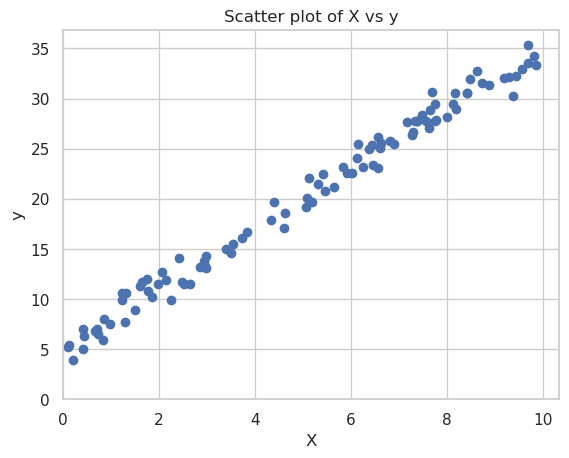

=== Case 1: Normal Residuals ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7328.
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           6.49e-94
Time:                        17:31:57   Log-Likelihood:                -144.53
No. Observations:                 100   AIC:                             293.1
Df Residuals:                      98   BIC:                             298.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.06

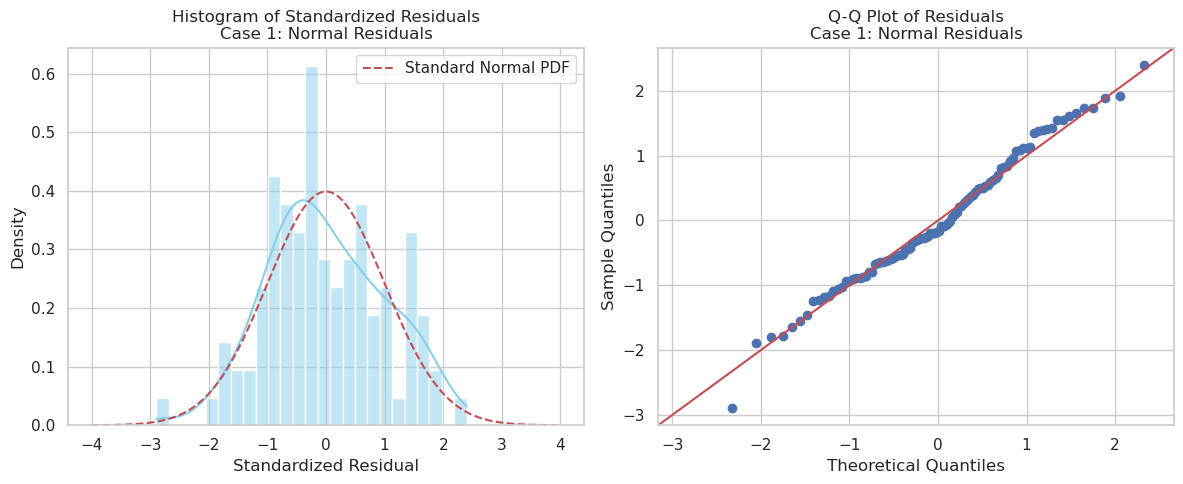

In [30]:

# Number of samples
n_samples = 100

# Generate feature X from a uniform distribution for variety
X = np.random.uniform(0, 10, size=(n_samples, 1))

# Generate noise from a normal distribution
noise_normal = np.random.normal(loc=0, scale=1, size=n_samples)

# Create target y with a linear relationship + normal noise
y = 3.0 * X.flatten() + 5.0 + noise_normal  # slope=3.0, intercept=5.0

# Plot to visualize the data
plot_scatter_plot(X, y)

# Fit and diagnose
model_normal, std_resid_normal = fit_and_diagnose(X, y, case_label="Case 1: Normal Residuals")



**Interpretation**:
- If the p-value is **much larger than 0.05**, it suggests we *cannot* reject the null hypothesis that residuals are normal.
- The histogram should appear roughly bell-shaped, and the points on the Q-Q plot should be near the 45-degree line.

## 4. Case 2: Non-Normally Distributed Residuals

**Goal:** Create a dataset where the true errors (`noise_nonnormal`) are drawn from a **skewed** (exponential) distribution.  
**Expected Result:** The **K-S test** will likely show a *small p-value*, indicating we *reject* normality.

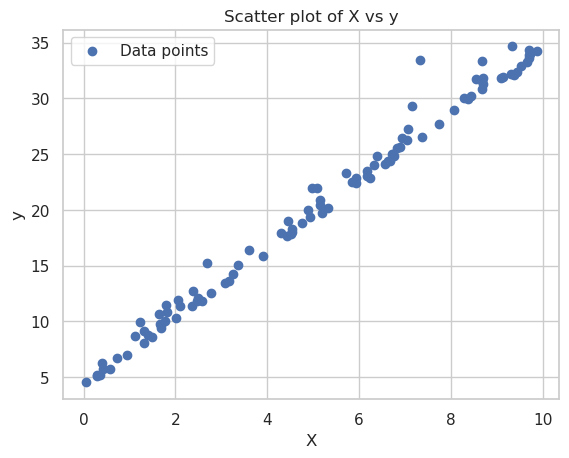

=== Case 2: Non-Normal Residuals ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8024.
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           8.04e-96
Time:                        17:24:06   Log-Likelihood:                -142.48
No. Observations:                 100   AIC:                             289.0
Df Residuals:                      98   BIC:                             294.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

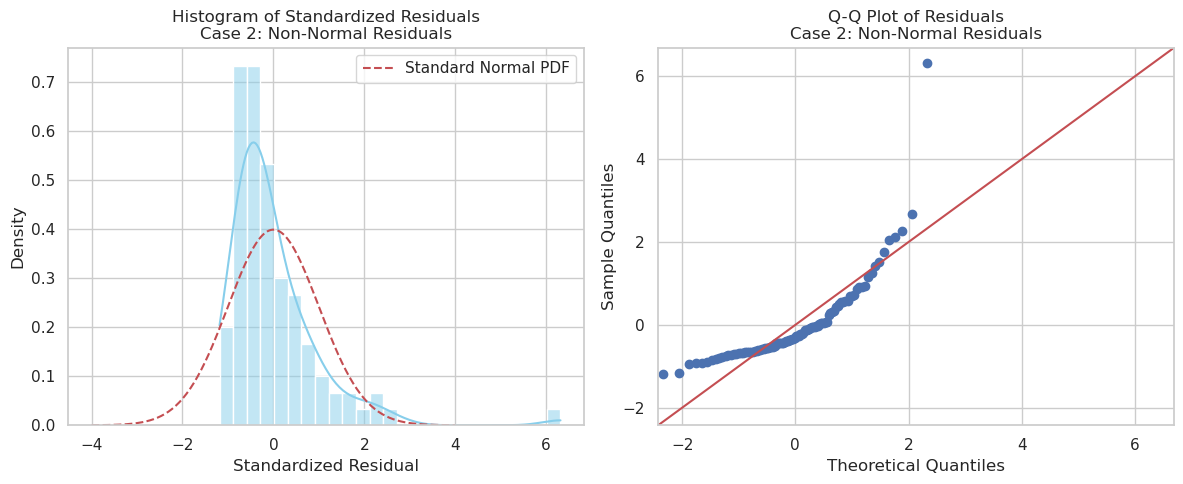

In [26]:
# Generate feature X again from a uniform distribution
X_nonnormal = np.random.uniform(0, 10, size=(n_samples, 1))

# Generate noise from an exponential distribution (which is skewed)
# Then center it by subtracting the mean so it's around zero.
noise_nonnormal = expon.rvs(size=n_samples, scale=1.0)
noise_nonnormal_centered = noise_nonnormal - np.mean(noise_nonnormal)

# Create target y with a linear relationship + skewed noise
y_nonnormal = 3.0 * X_nonnormal.flatten() + 5.0 + noise_nonnormal_centered

# Plot to visualize the data
plot_scatter_plot(X_nonnormal, y_nonnormal)

# Fit and diagnose
model_nonnormal, std_resid_nonnormal = fit_and_diagnose(X_nonnormal, y_nonnormal, case_label="Case 2: Non-Normal Residuals")



**Interpretation**:
- We typically expect the p-value to be **less than 0.05**, indicating the distribution of residuals deviates from normal.
- The histogram might show a skew, and the Q-Q plot will deviate from the 45-degree line, especially in the tails.

## 5. Additional Considerations
1. **Sample Size**:  
   - The Kolmogorov–Smirnov test can be very sensitive with large datasets, detecting even slight deviations from normality.
   - With small datasets, the test may lack the power to detect moderate deviations.
2. **Visual Inspections**:  
   - Histograms, Q-Q plots, and box plots can give you a quick sanity check.
   - Sometimes slight deviations from normality might not critically harm your model, especially if you have a moderately large sample size (thanks to the Central Limit Theorem).
3. **Alternative Tests**:  
   - **Shapiro–Wilk Test**: Often recommended for smaller sample sizes (< 50).  
   - **Anderson–Darling Test**: More sensitive to tails than the K-S test.  
   - **Lilliefors Test**: An adaptation of the K-S test that accounts for estimating the mean and variance from the data.
4. **When Residuals Are Not Normal**:  
   - **Try transforming** the dependent variable (log, sqrt, Box–Cox) to reduce skewness or kurtosis.  
   - Consider **robust regression** if outliers/skewness are major issues.  
   - Explore **generalized linear models (GLMs)** for data that naturally follows distributions other than normal (e.g., Poisson for counts).
5. **Practical Relevance**:  
   - Even if residuals are slightly non-normal, many inferences (e.g., coefficient estimates) remain unbiased due to the Gauss–Markov theorem, which requires only linearity, independence, and homoscedasticity (but not strictly normal residuals).  
    - However, normality is critical for **valid** p-values and confidence intervals from t-tests and F-tests in classical linear regression.




# Creating a Binary Classifier from the Kolmogorov-Smirnoff Test

This is the real goal of the notebook.

In [32]:
import numpy as np
from scipy.stats import kstest, norm

def is_normal_distribution(data, alpha=0.05):
    # Perform KS test
    statistic, p_value = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    # Binary outcome based on p-value
    return p_value > alpha

# We enter the residuals returned by the fit_and_diagnose function
print(f"Normal residuals: {is_normal_distribution(std_resid_normal)}")
print(f"Non-normal residuals: {is_normal_distribution(std_resid_nonnormal)}")

Normal residuals: True
Non-normal residuals: False


---

### In Summary
- The Kolmogorov–Smirnov test is a **quick, non-parametric** method to compare your empirical residual distribution to a theoretical (normal) distribution.
- Always **complement** the K-S test with **visual inspections** (histogram, Q-Q plot) and consider other tests when necessary.
- If non-normality is detected and is problematic for your inference, consider **transformations**, **robust methods**, or different **modeling assumptions**.

---

# Implementing the Kolmogorov-Smirnoff Test from Scratch

To better understand the Kolmogorov-Smirnoff test, it is instructive to implement it from scratch. This allows us to check our understanding of the underlying mathematics by constructing a working implementation.

In [ ]:
import numpy as np
import math

def _ecdf(x):
    """
    Return the empirical CDF values for a sorted array x.
    
    If x is sorted in ascending order and has n elements,
    the i-th element of the returned array is i/n.
    """
    n = len(x)
    # i/n for i=1..n
    return np.arange(1, n+1) / n

def _normal_cdf(x, mean, std):
    """
    Compute the CDF of a normal distribution with given mean and std.
    Uses the error function (erf) from the math module.
    """
    # standardize
    z = (x - mean) / (std * math.sqrt(2))
    return 0.5 * (1 + math.erf(z))

def _kolmogorov_pval(n, d, max_terms=100):
    """
    Approximate the p-value for the one-sample K-S test using the
    asymptotic formula:
    
    p = 2 * sum_{k=1..inf} [(-1)^(k-1) * exp(-2 * (k^2) * n * d^2)]
    
    We truncate the series at `max_terms`.
    
    Parameters
    ----------
    n : int
        Sample size
    d : float
        KS statistic
    max_terms : int
        Number of terms to sum in the asymptotic series.
    
    Returns
    -------
    pval : float
        Approximate p-value
    """
    if d == 0:
        return 1.0  # If no difference at all, p=1
    
    # The series can converge quickly for moderate to large n*d
    # We'll sum until max_terms or until the term becomes very small.
    
    s = 0.0
    for k in range(1, max_terms + 1):
        term = (-1)**(k-1) * math.exp(-2 * (k**2) * n * (d**2))
        s += term
        if abs(term) < 1e-12:
            break
    
    pval = 2 * s
    return max(0.0, min(1.0, pval))  # Ensure it's within [0, 1]

def kstest(data, dist='norm', args=()):
    """
    A simplified Kolmogorov–Smirnov test for one-sample comparison
    of `data` against a reference distribution specified by `dist`.

    Parameters
    ----------
    data : array_like
        The sample data.
    dist : str
        Name of the distribution to test against. Currently only
        'norm' (normal) is supported in this minimal example.
    args : tuple
        Parameters for the distribution. For 'norm', this is expected
        to be (mean, std).

    Returns
    -------
    ks_stat : float
        The Kolmogorov–Smirnov test statistic (D).
    p_value : float
        Approximate p-value based on the asymptotic formula.
    
    Example
    -------
    >>> data = np.random.normal(loc=0, scale=1, size=100)
    >>> ks_stat, p_val = kstest(data, 'norm', args=(data.mean(), data.std()))
    >>> print(ks_stat, p_val)
    """
    # Convert data to a numpy array
    data = np.asarray(data)
    
    # Sort the data
    data_sorted = np.sort(data)
    n = len(data_sorted)
    
    # Identify which distribution's CDF to use
    if dist == 'norm':
        if len(args) != 2:
            raise ValueError("For 'norm', args should be (mean, std).")
        mean, std = args
        if std <= 0:
            raise ValueError("Standard deviation must be positive.")
        cdf_func = lambda x: _normal_cdf(x, mean, std)
    else:
        raise NotImplementedError(f"Distribution '{dist}' not supported in this minimal version.")
    
    # Compute the empirical CDF
    ecdf_vals = _ecdf(data_sorted)
    
    # Compute the distribution's CDF for each data point
    cdf_vals = np.array([cdf_func(x) for x in data_sorted])
    
    # K-S statistic components
    d_plus = np.max(ecdf_vals - cdf_vals)      # i/n - F(x_i)
    d_minus = np.max(cdf_vals - np.concatenate(([0], ecdf_vals[:-1])))  # F(x_i) - (i-1)/n
    
    ks_stat = max(d_plus, d_minus)
    
    # Approximate p-value for large n
    p_value = _kolmogorov_pval(n, ks_stat)
    
    return ks_stat, p_value
